<a href="https://colab.research.google.com/github/tati373/Data110/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The dataset chosen for this project is the "Students Performance in Exams" dataset. It includes data on student scores in subjects such as math, writing, and reading and demographic information such as gender, parental level of education, lunch type, and test preparation. The dataset was selected because of the potential insights into how different factors might influence student performance.

# EDA Summary
The dataset has 1,000 rows and 8 columns, including gender, race/ethnicity, parental level of education, lunch type, test preparation course, and scores in math, reading, and writing.

No missing data was found, and the columns were well-labeled and clean.

Preliminary analysis showed gender-based differences in scores and positive correlations between subject performances.

In [8]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [9]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("StudentsPerformance.csv")

# preview data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
# info and summary
df.info()
df.describe()

# check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [11]:
df.columns = df.columns.str.replace(' ', '_')


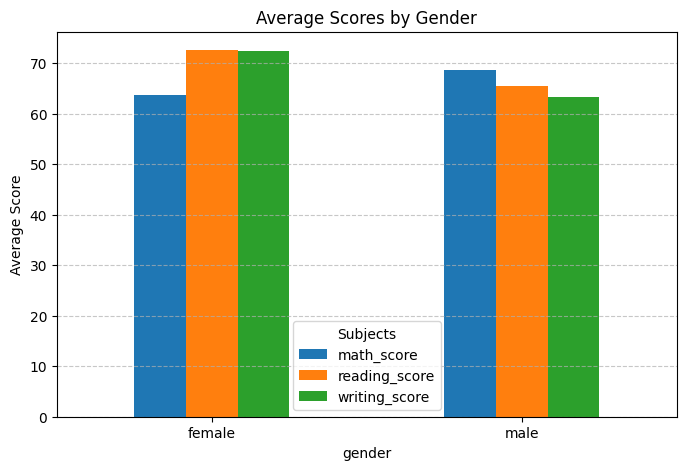

In [12]:
# bar chart comparing average math, reading, and writing scores by gender
avg_scores = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

avg_scores.plot(x='gender', kind='bar', figsize=(8,5))
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Subjects')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


A grouped bar chart is used for comparing multiple categories across a variable—in this case, comparing average scores by gender for three subjects.

This bar chart compares the average scores in math, reading, and writing between male and female students. Female students scored higher in reading and writing, while males scored outperslightly higher in math.

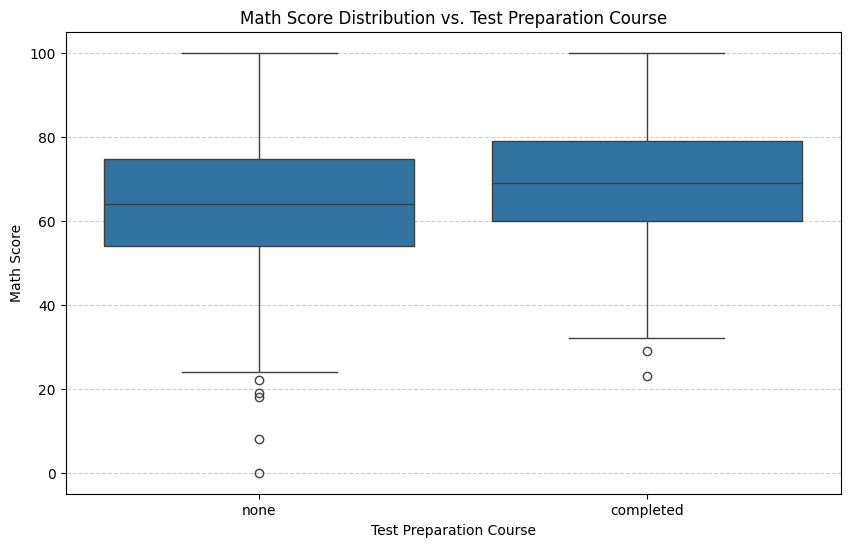

In [13]:
# boxplot to show score distribution by test preparation course completion
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='test_preparation_course', y='math_score')
plt.title('Math Score Distribution vs. Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


A boxplot helps visualize the distribution of scores and detect outliers. It’s  useful for comparing performance across categories.

This boxplot shows that students who completed a test preparation course tend to have higher math scores compared to those who didn't.

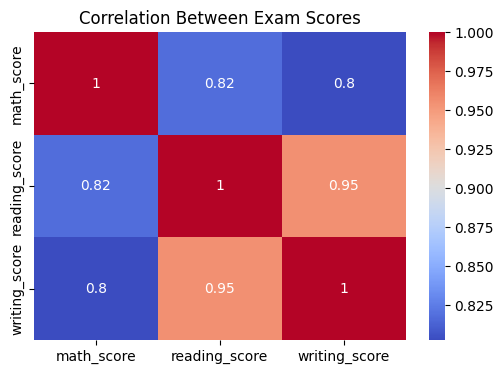

In [14]:
# correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Exam Scores')
plt.show()


A heatmap allows quick visual inspection of correlations between numerical variables.

The heatmap reveals a strong positive correlation between reading and writing scores, followed by moderate correlations between math and the other two subjects.

Key Insights:
- Female students scored higher in reading and writing; male students scored slightly higher in math.
- Completing the test preparation course was associated with improved math performance.
- Reading and writing scores are highly correlated, suggesting students who do well in one tend to do well in the other.

Recommendations:
- Encourage more students to complete test preparation courses.
- Focus additional support on areas with weaker performance (ex., writing for male students).